# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
# Read the dataset
Dataset_Df = pd.read_csv('cancer.csv', sep=',') 
Dataset_Df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
print('\033[1mDataset datatypes:')
print(Dataset_Df.dtypes)
print('\nShape of the dataset: Rows-', Dataset_Df.shape[0] ,'Columns-', Dataset_Df.shape[1])

Dataset datatypes:
ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

Shape of the dataset: Rows- 699 Columns- 11


In [5]:
Dataset_Df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [6]:
# Bare Nuclei is showing datatype object eventhough the data is numeric.
print('Unique Value in column Bare Nuclei:\n', Dataset_Df['Bare Nuclei'].unique())

Unique Value in column Bare Nuclei:
 ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [7]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column
Dataset_Df.info() # Checking missing/nonnull values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
print('Unique Value Counts in column Bare Nuclei:\n', Dataset_Df['Bare Nuclei'].value_counts())

Unique Value Counts in column Bare Nuclei:
 1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64


In [9]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [10]:
Dataset_Df = Dataset_Df.replace('?', 1) # Replace ? with 1 (mode of this datacolumn is 1 )

In [11]:
#converting object to int datatype
Dataset_Df['Bare Nuclei'] = Dataset_Df['Bare Nuclei'].astype('int64')

In [12]:
Dataset_Df.info() # Recheck datatype and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           699 non-null    int64
 1   ClumpThickness               699 non-null    int64
 2   Cell Size                    699 non-null    int64
 3   Cell Shape                   699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Bland Chromatin              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [13]:
#Removing duplicates data rows
Dataset_Df.drop_duplicates(subset=None, keep ='first', inplace = True)
print('Number of rows after removing duplicates:', Dataset_Df.shape[0])

Number of rows after removing duplicates: 690


In [14]:
 Dataset_Df.drop(['ID'], axis=1, inplace = True)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


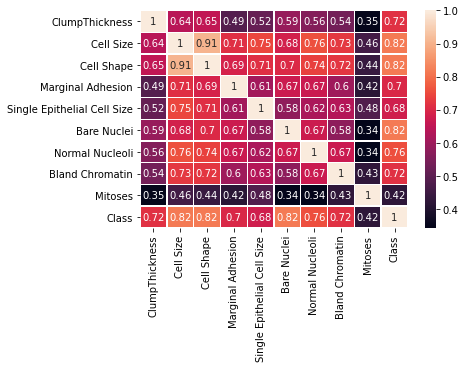

In [15]:
# Check for correlation of variables
sns.heatmap(Dataset_Df.corr(),annot=True, linewidth = 0.4)

In [16]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

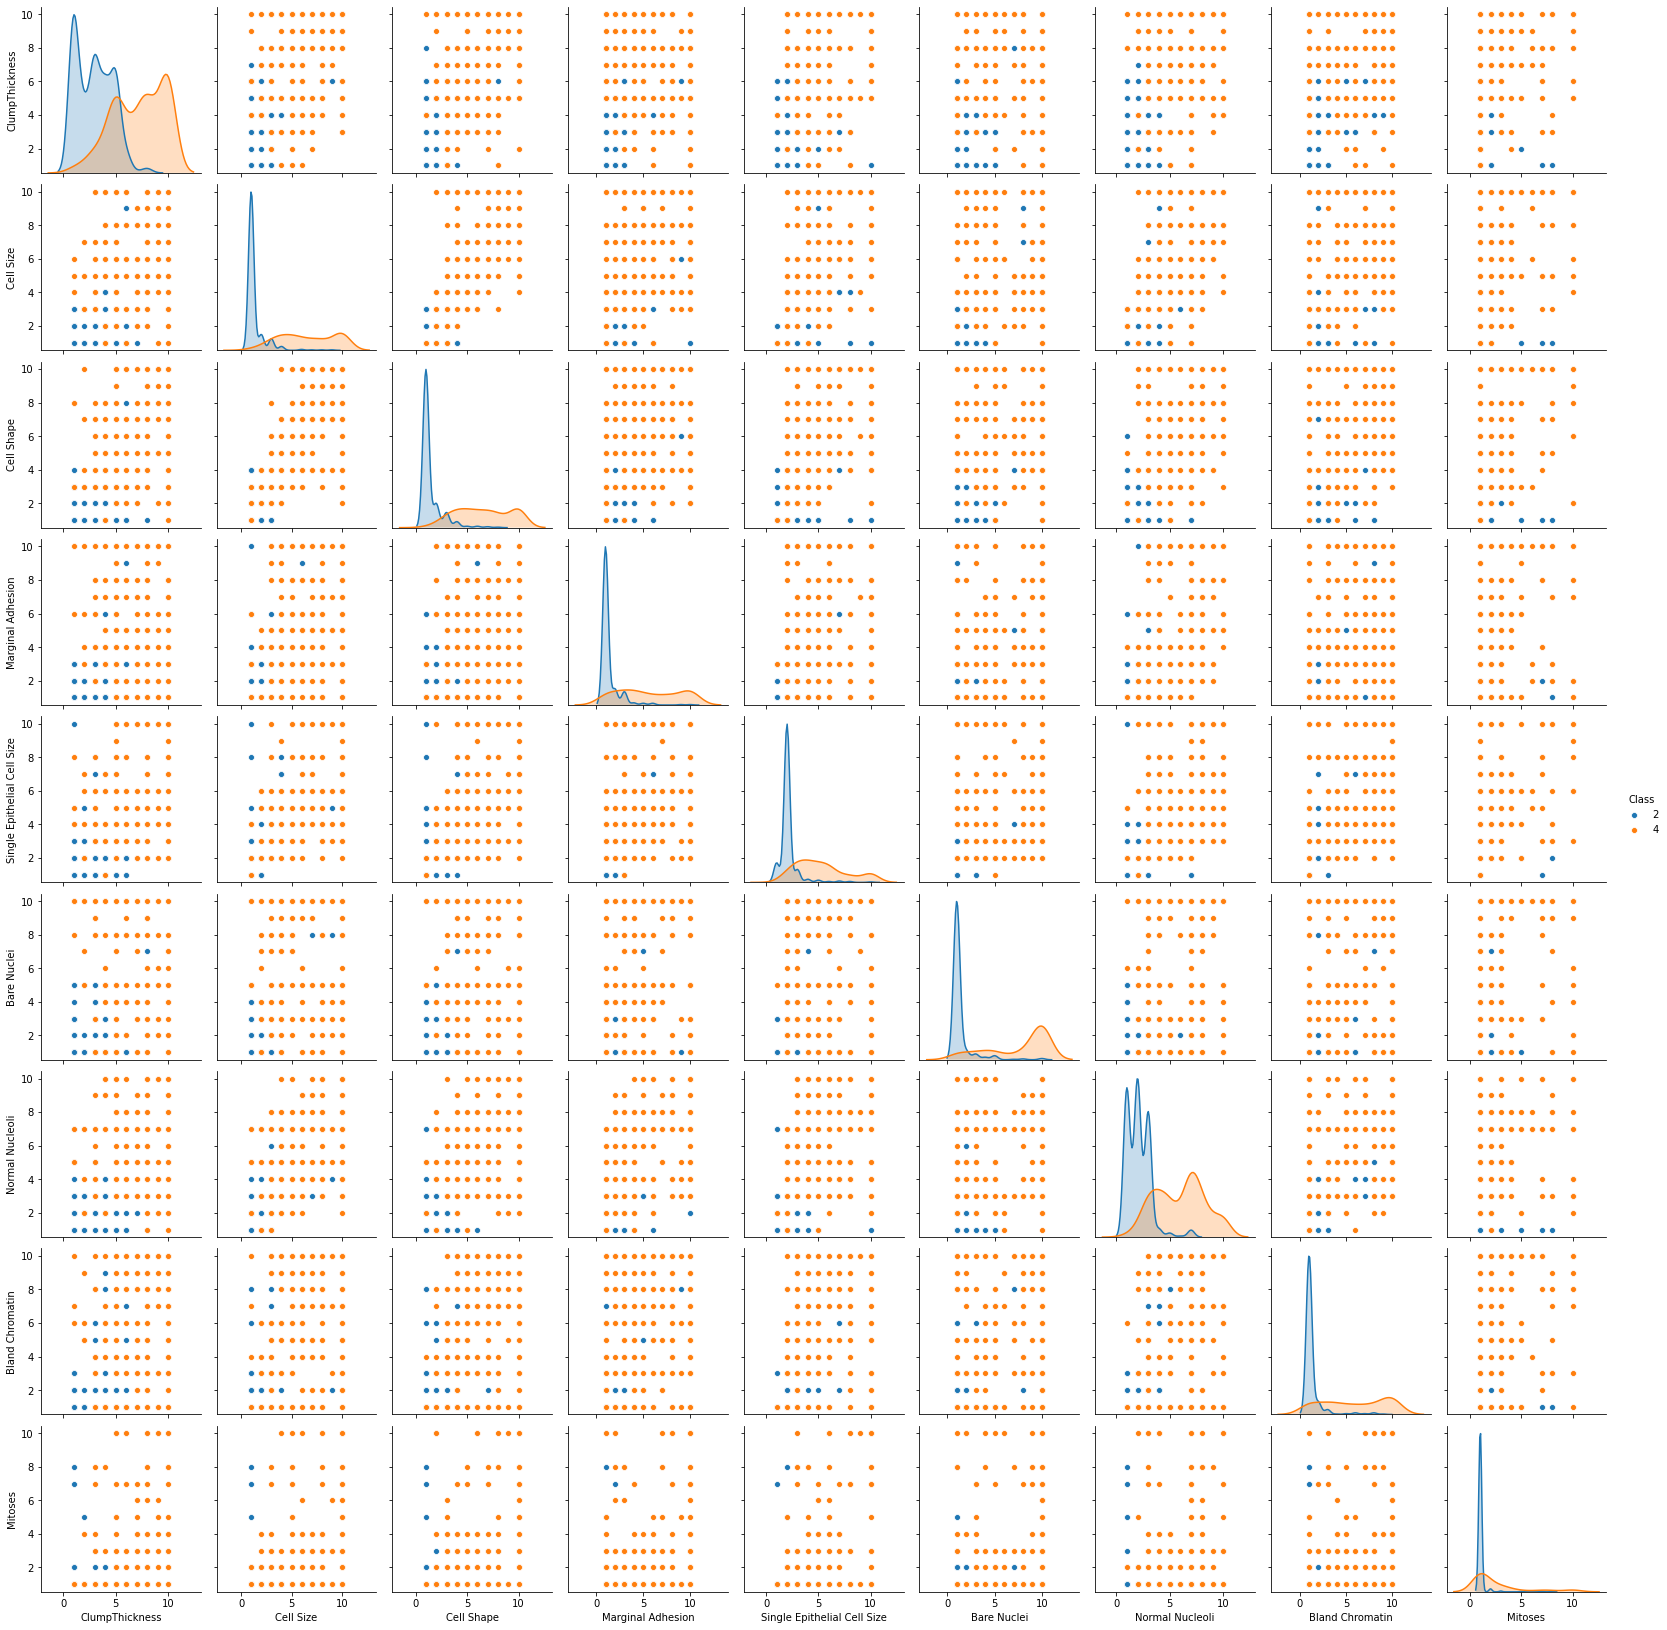

In [17]:
#Let us check the pair plot
import warnings
warnings.filterwarnings('ignore')
sns.distributions._has_statsmodels = False
sns.pairplot(Dataset_Df,diag_kind='kde',hue='Class')

In [18]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [19]:
# We could see most of the outliers are now removed.
# For PCA we need independent attributes and hence we can remove class column

In [20]:
 Dataset_Df.drop(['Class'], axis=1, inplace = True)

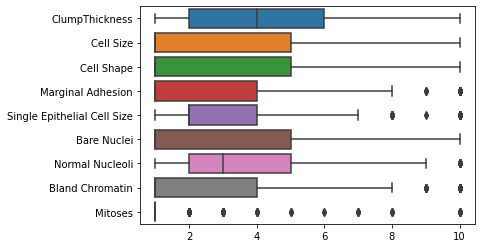

In [21]:
sns.boxplot(data=Dataset_Df,orient='h')

In [22]:
Dataset_Df['Marginal Adhesion']=np.where(Dataset_Df['Marginal Adhesion']>4,4,Dataset_Df['Marginal Adhesion'])
Dataset_Df['Marginal Adhesion'].value_counts()

1    400
4    176
3     58
2     56
Name: Marginal Adhesion, dtype: int64

In [23]:
Dataset_Df['Single Epithelial Cell Size']=np.where(Dataset_Df['Single Epithelial Cell Size']>4,4,Dataset_Df['Single Epithelial Cell Size'])
Dataset_Df['Single Epithelial Cell Size'].value_counts()

2    382
4    192
3     71
1     45
Name: Single Epithelial Cell Size, dtype: int64

In [24]:
Dataset_Df['Bland Chromatin']=np.where(Dataset_Df['Bland Chromatin']>4,4,Dataset_Df['Bland Chromatin'])
Dataset_Df['Bland Chromatin'].value_counts()

1    436
4    176
3     42
2     36
Name: Bland Chromatin, dtype: int64

In [25]:
Dataset_Df['Mitoses']=np.where(Dataset_Df['Mitoses']>4,4,Dataset_Df['Mitoses'])
Dataset_Df['Mitoses'].value_counts()

1    571
4     52
2     35
3     32
Name: Mitoses, dtype: int64

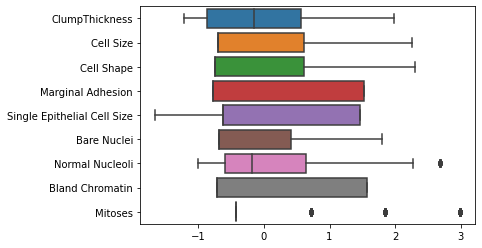

In [26]:
from scipy.stats import zscore
scaledX = Dataset_Df.apply(zscore)
sns.boxplot(data=scaledX,orient='h')

# Q6 Create a covariance matrix for identifying Principal components

In [27]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(scaledX.T)

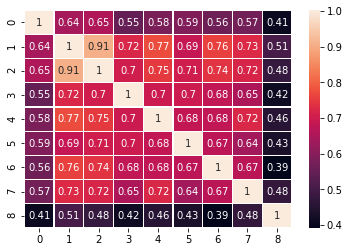

In [28]:
sns.heatmap(cov_matrix,annot=True, linewidth = 0.2) # Same as above heatmap on correlation

# Q7 Identify eigen values and eigen vector

In [29]:
# Step 2- Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors:')
pd.DataFrame(eigenvectors).T

Eigen Vectors:


,0,1,2,3,4,5,6,7,8
0,-0.302931,-0.370748,-0.367288,-0.336668,-0.349397,-0.335295,-0.339750,-0.339347,-0.239679
1,-0.013837,0.041708,0.074816,0.164410,0.071865,0.106323,0.222368,-0.009141,-0.948388
2,0.014564,0.734845,-0.664329,-0.039469,-0.065594,0.084049,-0.062319,0.015683,-0.037457
3,0.923607,-0.032666,0.029131,-0.227296,-0.161302,-0.020322,-0.171355,-0.162866,-0.105127
4,-0.041477,0.334100,0.300338,-0.458736,0.137619,-0.677827,0.089047,0.303196,-0.088140
5,0.117413,-0.212378,-0.368631,-0.090641,0.686036,-0.189738,0.399855,-0.353960,0.072033
6,0.085987,-0.302684,-0.297450,-0.008452,0.368307,0.054753,-0.445664,0.679416,-0.116492
7,0.178531,-0.156613,-0.260935,0.570882,-0.348183,-0.517197,0.312424,0.245361,0.055413
8,-0.002378,-0.216494,-0.186184,-0.511635,-0.309792,0.320710,0.581239,0.344914,0.032568


In [30]:
print('Eigen Values:')
pd.DataFrame(eigenvalues).T

Eigen Values:


,0,1,2,3,4,5,6,7,8
0,6.120589,0.704734,0.090316,0.496552,0.401303,0.249172,0.348533,0.293064,0.308801


In [31]:
# A -Covariance matrix
# v -eigen vector
# L -eigen value
# A.v = L.v
L = cov_matrix.dot(eigenvectors[:,1])
R = eigenvalues[1]*eigenvectors[:,1]
print(L)
print(R)

[-0.00975157  0.02939286  0.0527256   0.1158656   0.05064588  0.07492909
  0.15671052 -0.00644193 -0.66836127]
[-0.00975157  0.02939286  0.0527256   0.1158656   0.05064588  0.07492909
  0.15671052 -0.00644193 -0.66836127]


# Q8 Find variance and cumulative variance by each eigen vector

In [32]:
var_explained = [(i / sum(eigenvalues))*100 for i in sorted(eigenvalues, reverse = True)]
cum_var_exp = np.cumsum(var_explained)
print("Cumulative Variance Explained \n",cum_var_exp)

Cumulative Variance Explained 
 [ 67.90797897  75.72700593  81.23625203  85.68871234  89.55568338
  92.98182861  96.23337394  98.99794311 100.        ]


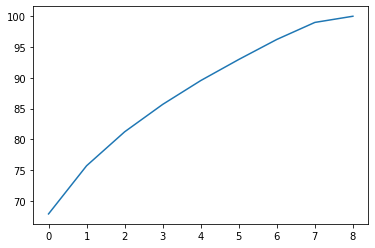

In [33]:
plt.plot(cum_var_exp)

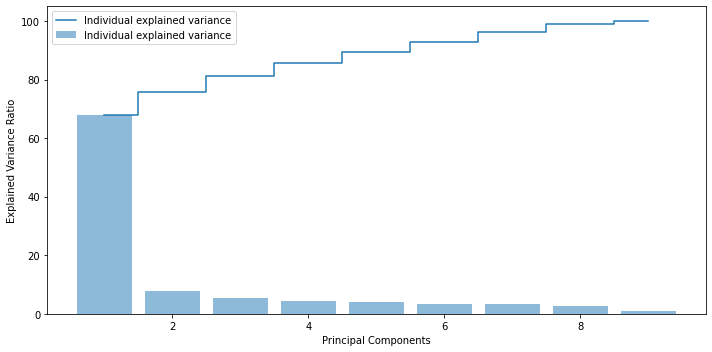

In [34]:
plt.figure(figsize=(10,5))
plt.bar(range(1, eigenvalues.size + 1), var_explained, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label='Individual explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [35]:
from sklearn.decomposition import PCA
pca = PCA(0.95) # Capturing 95% variance in the data
transformed_data = pca.fit_transform(scaledX)

In [36]:
pca.n_components_ # number of principal components

7

In [37]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8
0,0.302931,0.370748,0.367288,0.336668,0.349397,0.335295,0.339750,0.339347,0.239679
1,0.013837,-0.041708,-0.074816,-0.164410,-0.071865,-0.106323,-0.222368,0.009141,0.948388
2,0.923607,-0.032666,0.029131,-0.227296,-0.161302,-0.020322,-0.171355,-0.162866,-0.105127
3,-0.041477,0.334100,0.300338,-0.458736,0.137619,-0.677827,0.089047,0.303196,-0.088140
4,-0.085987,0.302684,0.297450,0.008452,-0.368307,-0.054753,0.445664,-0.679416,0.116492
5,-0.002378,-0.216494,-0.186184,-0.511635,-0.309792,0.320710,0.581239,0.344914,0.032568
6,-0.178531,0.156613,0.260935,-0.570882,0.348183,0.517197,-0.312424,-0.245361,-0.055413


In [38]:
pd.DataFrame(transformed_data)

,0,1,2,3,4,5,6
0,-1.586240,-0.030527,0.671340,0.075954,0.166342,0.295719,-0.208926
1,1.750166,-0.934593,-0.366886,-1.520582,-0.634458,-0.870300,0.713368
2,-1.708675,-0.069773,0.009592,-0.082115,0.212279,0.386139,0.060994
3,1.663601,-0.440521,0.435098,1.817007,-0.450294,0.091975,0.933293
4,-1.174944,-0.288843,-0.007047,-0.616350,0.209912,-0.492003,-1.025395
...,...,...,...,...,...,...,...
685,-1.624216,0.037727,-0.017521,-0.012185,-0.534989,-0.411410,0.678261
686,-2.187263,0.136826,-0.172526,0.047230,-0.106986,-0.177725,0.237161
687,3.804285,-0.201999,-0.876897,1.960265,0.670768,-0.147450,-0.087874
688,2.952245,-1.417223,-1.257336,0.838122,0.706610,0.702594,-1.331547


# Q10 Find correlation between components and features

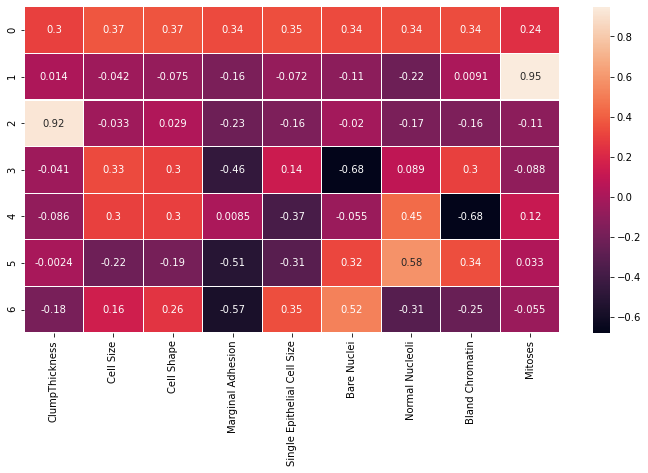

In [39]:
map=pd.DataFrame(pca.components_,columns=list(scaledX))
plt.figure(figsize=(12,6))
sns.heatmap(map,annot=True, linewidth = 0.2)